# Outlierness DOI Component Tests

"Testing" the outlierness_doi_component class (not an exhaustive unit test, but more of a playground).

Below, we begin by replicating the outlierness example from the sklearn docs to get a feeling for how the different techniques perform across different types of 2d-distributions.

Automatically created module for IPython interactive environment


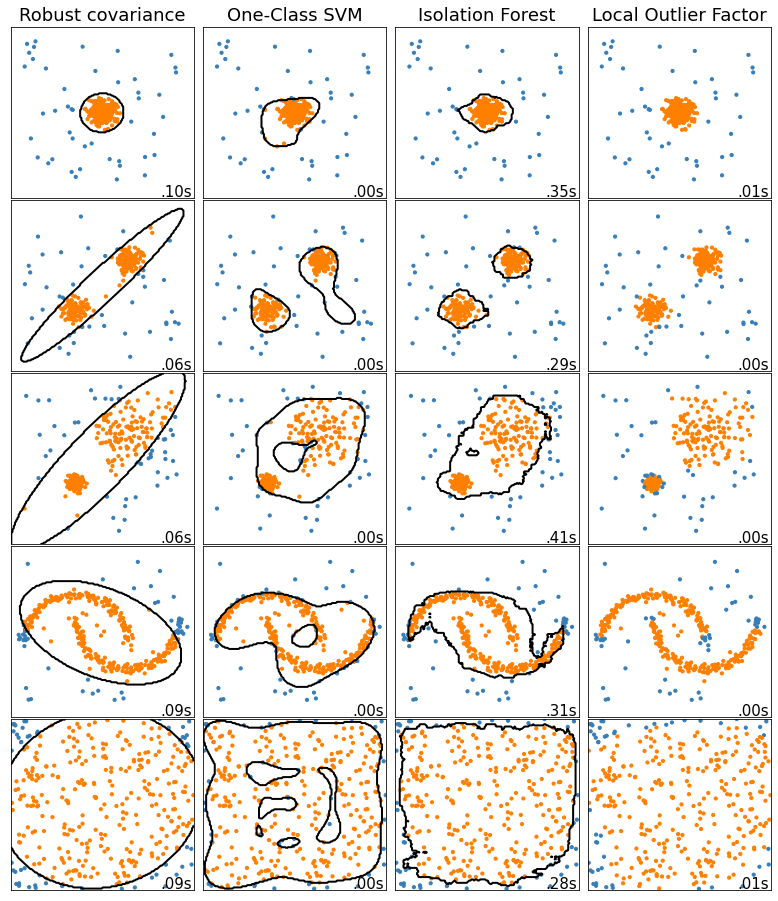

In [2]:
# from https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html

# Author: Alexandre Gramfort <alexandre.gramfort@inria.fr>
#         Albert Thomas <albert.thomas@telecom-paristech.fr>
# License: BSD 3 clause

import time

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

print(__doc__)

matplotlib.rcParams['contour.negative_linestyle'] = 'solid'

# Example settings
n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# define outlier/anomaly detection methods to be compared
anomaly_algorithms = [
    ("Robust covariance", EllipticEnvelope(contamination=outliers_fraction)),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf",
                                      gamma=0.1)),
    ("Isolation Forest", IsolationForest(contamination=outliers_fraction,
                                         random_state=42)),
    ("Local Outlier Factor", LocalOutlierFactor(
        n_neighbors=35, contamination=outliers_fraction))]

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]

# Compare given classifiers under given settings
xx, yy = np.meshgrid(np.linspace(-7, 7, 150),
                     np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    # Add outliers
    X = np.concatenate([X, rng.uniform(low=-6, high=6,
                       size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        # fit the data and tag outliers
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        # plot the levels lines and the points
        if name != "Local Outlier Factor":  # LOF does not implement predict
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

        colors = np.array(['#377eb8', '#ff7f00'])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()

## Importing the DOI component

In [1]:
import sys; sys.path.append('../') # required for relative imports in python ;)
from outlierness_component import *

## Test on Iris dataset

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

X_train["id"] = X_train.index
X_test["id"] = X_test.index

In [5]:
outlierness = OutliernessComponent()

print(X_train)
outlierness.compute_doi(X_train)
outlierness.train(X_train)
outlierness.predict_doi(X_test.drop(columns=["id"]))
err = outlierness.get_prediction_error(X_test)

print("mean error", err.mean())

      0    1    2    3  id
0   4.6  3.1  1.5  0.2   0
1   5.9  3.0  5.1  1.8   1
2   5.1  2.5  3.0  1.1   2
3   4.6  3.4  1.4  0.3   3
4   6.2  2.2  4.5  1.5   4
..  ...  ...  ...  ...  ..
70  4.9  3.1  1.5  0.1  70
71  6.3  2.9  5.6  1.8  71
72  5.8  2.7  4.1  1.0  72
73  7.7  3.8  6.7  2.2  73
74  4.6  3.2  1.4  0.2  74

[75 rows x 5 columns]
mean error -0.0039184536630401555


## More "Benchmarks"

In [4]:
from sklearn.datasets import make_moons, make_blobs

# Example settings
n_samples = 1000 # gets too slow at around 100,000 samples
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5,
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5],
               **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, .3],
               **blobs_params)[0],
    4. * (make_moons(n_samples=n_samples, noise=.05, random_state=0)[0] -
          np.array([0.5, 0.25])),
    14. * (np.random.RandomState(42).rand(n_samples, 2) - 0.5)]


outlierness = OutliernessComponent()

for d in datasets:
    X_train = pd.DataFrame(d[:len(d) // 2, :])
    X_test = pd.DataFrame(d[len(d) // 2:, :])
    X_test["id"] = X_test.index
    X_train["id"] = X_train.index
    outlierness.train(X_train)
    err = outlierness.get_prediction_error(X_test)
    print(err.mean())

-0.46266645799565315
-0.027520568007963785
-0.0004444538627931945
-0.013216436223285381
-0.006638877322703677
